<a href="https://colab.research.google.com/github/plaban1981/Hugging_Face_transformers_topics/blob/main/Image_to_prompt_generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi -L

GPU 0: NVIDIA A100-SXM4-40GB (UUID: GPU-4aebf722-4bd8-0ff9-749d-c133598c660c)


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


https://www.youtube.com/watch?v=2FZ6Tc7Yc_U&list=PLc9_vneTcTGXdjoCD0b_-2x3-HqsvxCZH&index=42

https://pharmapsychotic.com/tools.html

https://huggingface.co/spaces/pharma/CLIP-Interrogator/blob/main/app.py

https://www.youtube.com/watch?v=2EV5SZ1Klro

In [ ]:
os.mkdir("/content/drive/MyDrive/STABLE_DIFFUSION/image_to_prompt/output")

In [ ]:
for files in os.listdir("/content/output"):
  shutil.copy(os.path.join("/content/output",files),"/content/drive/MyDrive/STABLE_DIFFUSION/image_to_prompt/output")

In [ ]:
import os, subprocess

def setup():
    install_cmds = [
        ['pip', 'install','-q','transformers==4.15.0'],
        ['pip', 'install', '-q','gradio'],
        ['pip', 'install','-q','open_clip_torch'],
        ['pip', 'install', '-q','clip-interrogator'],
    ]
    for cmd in install_cmds:
        print(subprocess.run(cmd, stdout=subprocess.PIPE).stdout.decode('utf-8'))

setup()


In [3]:
! pip install -q transformers==4.15.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 36.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 880.6/880.6 KB 62.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 90.1 MB/s eta 0:00:00


In [4]:
import transformers
transformers.__version__

'4.15.0'

In [6]:
! pip install -q open_clip_torch

In [5]:
! pip install -q clip-interrogator==0.5.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 787.8/787.8 KB 14.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.0/43.0 KB 5.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 53.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 79.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.0/377.0 KB 34.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.4/235.4 KB 25.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.

In [ ]:
from transformers import AutoProcessor, AutoModelForZeroShotImageClassification
processor = AutoProcessor.from_pretrained("openai/clip-vit-large-patch14")
model = AutoModelForZeroShotImageClassification.from_pretrained("openai/clip-vit-large-patch14")

ImportError: ignored

In [ ]:
model.save_pretrained("clip-vit-large-patch14")

## Trying out new download

In [8]:
from clip_interrogator import Config, Interrogator
MODELS = ['ViT-L (best for Stable Diffusion 1.*)', 'ViT-H (best for Stable Diffusion 2.*)']

# load BLIP and ViT-L https://huggingface.co/openai/clip-vit-large-patch14
config = Config(clip_model_name="ViT-L-14/openai")
ci_vitl = Interrogator(config)
ci_vitl.clip_model = ci_vitl.clip_model.to("cpu")

# load ViT-H https://huggingface.co/laion/CLIP-ViT-H-14-laion2B-s32B-b79K
config.blip_model = ci_vitl.blip_model
config.clip_model_name = "ViT-H-14/laion2b_s32b_b79k"
ci_vith = Interrogator(config)
ci_vith.clip_model = ci_vith.clip_model.to("cpu")

Loading BLIP model...


Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

  0%|          | 0.00/1.66G [00:00<?, ?B/s]

load checkpoint from https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model_large_caption.pth
Loading CLIP model...


100%|████████████████████████████████████████| 933M/933M [00:03<00:00, 248MiB/s]
ViT-L-14_openai_artists.safetensors: 100%|██████████| 16.2M/16.2M [00:00<00:00, 116MB/s]
ViT-L-14_openai_flavors.safetensors: 100%|██████████| 155M/155M [00:00<00:00, 258MB/s]
ViT-L-14_openai_mediums.safetensors: 100%|██████████| 146k/146k [00:00<00:00, 5.86MB/s]
ViT-L-14_openai_movements.safetensors: 100%|██████████| 307k/307k [00:00<00:00, 9.03MB/s]
ViT-L-14_openai_trendings.safetensors: 100%|██████████| 111k/111k [00:00<00:00, 4.94MB/s]
Preprocessing negative: 100%|██████████| 1/1 [00:03<00:00,  3.03s/it]


Loaded CLIP model and data in 18.45 seconds.
Loading CLIP model...


ViT-H-14_laion2b_s32b_b79k_artists.safetensors: 100%|██████████| 21.6M/21.6M [00:00<00:00, 122MB/s] 
ViT-H-14_laion2b_s32b_b79k_flavors.safetensors: 100%|██████████| 207M/207M [00:00<00:00, 248MB/s]
ViT-H-14_laion2b_s32b_b79k_mediums.safetensors: 100%|██████████| 195k/195k [00:00<00:00, 6.71MB/s]
ViT-H-14_laion2b_s32b_b79k_movements.safetensors: 100%|██████████| 410k/410k [00:00<00:00, 10.2MB/s]
ViT-H-14_laion2b_s32b_b79k_trendings.safetensors: 100%|██████████| 148k/148k [00:00<00:00, 5.97MB/s]
Preprocessing negative: 100%|██████████| 1/1 [00:00<00:00, 29.71it/s]


Loaded CLIP model and data in 34.73 seconds.


In [11]:
! git lfs install
! git clone https://huggingface.co/laion/CLIP-ViT-H-14-laion2B-s32B-b79K

Error: Failed to call git rev-parse --git-dir: exit status 128 
Git LFS initialized.
Cloning into 'CLIP-ViT-H-14-laion2B-s32B-b79K'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 36 (delta 0), reused 3 (delta 0), pack-reused 33
Unpacking objects: 100% (36/36), 1.07 MiB | 6.62 MiB/s, done.
Filtering content: 100% (2/2), 7.34 GiB | 110.72 MiB/s, done.


In [4]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"

In [5]:
def image_to_prompt(image, clip_model_name, mode):
    # move selected model to GPU and other model to CPU
    if clip_model_name == MODELS[0]:
        ci_vith.clip_model = ci_vith.clip_model.to("cpu")
        ci_vitl.clip_model = ci_vitl.clip_model.to(ci_vitl.device)
        ci = ci_vitl
    else:
        ci_vitl.clip_model = ci_vitl.clip_model.to("cpu")
        ci_vith.clip_model = ci_vith.clip_model.to(ci_vith.device)
        ci = ci_vith

    ci.config.blip_num_beams = 64
    ci.config.chunk_size = 2048
    ci.config.flavor_intermediate_count = 2048 if clip_model_name == MODELS[0] else 1024

    image = image.convert('RGB')
    if mode == 'best':
        prompt = ci.interrogate(image)
    elif mode == 'classic':
        prompt = ci.interrogate_classic(image)
    elif mode == 'fast':
        prompt = ci.interrogate_fast(image)
    elif mode == 'negative':
        prompt = ci.interrogate_negative(image)

    return prompt



## Test the function

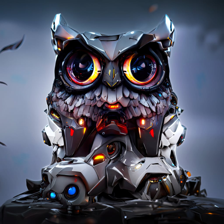

In [14]:
from IPython.display import clear_output, display
image = Image.open("/content/robo_owl.jpg")
thumb = image.copy()
thumb.thumbnail([224,224])
display(thumb)

In [13]:
from PIL import Image
image_to_prompt(Image.open("/content/robo_owl.jpg"),MODELS[0],'best')

100%|██████████| 50/50 [00:00<00:00, 205.97it/s]


'a close up of a robot owl with glowing eyes, very beautiful digital art, style of ilya kushinov, add text: auto repair, intelligent eyes. symmetrical, brian sum, style of marcin blaszczak, evil artificial intelligence, love death and robots, dribbble, photo 3d, breathtaking digital art, by Alexey Merinov, poster of a techno night'

In [20]:
prompt_list = []

In [21]:
image_path = "/content/my_images"
image_list = [os.path.join(image_path,i) for i in os.listdir(image_path)]
image_list

['/content/my_images/robo_owl.jpg',
 '/content/my_images/55aaa9d7a475c281fcb47e242db7feb9.jpg',
 '/content/my_images/maxresdefault.jpg',
 '/content/my_images/thetree.png',
 '/content/my_images/rockland.jpeg']

## Steps to browse through the image folder to generate prompts

In [22]:
from PIL import Image
from IPython.display import clear_output, display
from tqdm import tqdm
prompt_list = []
for idx, images in enumerate(tqdm(image_list, desc='Generating prompts')):
    if idx > 0 and idx % 100 == 0:
        clear_output(wait=True)

    prompt = image_to_prompt(Image.open(images), MODELS [1], 'best')
    prompt_list.append(prompt)

100%|██████████| 55/55 [00:00<00:00, 168.41it/s]

Flavor chain:  34%|███▍      | 11/32 [00:09<00:17,  1.21it/s]

100%|██████████| 55/55 [00:00<00:00, 168.71it/s]

100%|██████████| 6/6 [00:00<00:00, 136.11it/s]

100%|██████████| 55/55 [00:00<00:00, 174.76it/s]

Flavor chain:  44%|████▍     | 14/32 [00:10<00:13,  1.36it/s]

100%|██████████| 55/55 [00:00<00:00, 169.66it/s]

100%|██████████| 6/6 [00:00<00:00, 133.49it/s]

100%|██████████| 55/55 [00:00<00:00, 173.83it/s]

Flavor chain:  47%|████▋     | 15/32 [00:11<00:12,  1.35it/s]

100%|██████████| 55/55 [00:00<00:00, 168.90it/s]

100%|██████████| 6/6 [00:00<00:00, 135.39it/s]

100%|██████████| 55/55 [00:00<00:00, 102.12it/s]

Flavor chain:  44%|████▍     | 14/32 [00:10<00:13,  1.35it/s]

100%|██████████| 55/55 [00:00<00:00, 171.41it/s]

100%|██████████| 6/6 [00:00<00:00, 127.59it/s]

100%|██████████| 55/55 [00:00<00:00, 173.67it/s]

Flavor chain:  28%|██▊       | 9/32 [00:06<00:17,  1.32it/s]

100%|██████████| 55/55 [00:00<00:00, 172.39i

In [23]:
prompt_list

['a close up of a robot owl with glowing eyes, unreal engine character art, from transformers, by Zlatyu Boyadzhiev, cute owl, made up of many bits of metal, unreal engine ”, robot face bust, painting by android jones, angry 8 k, character design contest winner, cgsociety - w 1 0 2 4 - n 8 - i',
 'a man riding a horse through a lush green valley, feng zhu concept art, giant medieval tower concept art, mobile wallpaper, lovely valley, inspired by Stephan Martiniere, zenithal view, <mmorpgs scene, beautiful scenic view, anime beautiful peace scene, vertical wallpaper, beautiful render of a fairytale, sunny landscape, beautiful rendering, an amazing landscape image',
 'a man standing on top of a snow covered mountain, andreas rocha and john howe, world seen only through a portal, teaser, gigantic mountains, from of thrones, speedpaint, himalayas, 2029, omg, devils horns, animation still screencap, jaw dropping beauty, art of angrysnail, 8 0 s art, by Doris Blair',
 'a castle sitting on to

#### Save the prompts to prompts.csv file

In [26]:
os.mkdir("/content/output")

In [24]:
import csv
from IPython.display import clear_output, display
folder_path = "/content/output"
csv_path = os.path.join(folder_path, 'desc.csv')
def generate_prompt_csv(csv_path,image_list,prompt_list):
  with open(csv_path, 'w', encoding='utf-8', newline='') as f:
    w = csv.writer(f, quoting=csv.QUOTE_MINIMAL)
    w.writerow(['image', 'prompt'])
    for image_path, prompt in zip(image_list,prompt_list):
      if len(prompt):
        w.writerow([image_path, prompt])

        image = Image.open(image_path)
        thumb = image.copy()
        thumb.thumbnail([256, 256])
        display(thumb)
        print(prompt)
        print(f"\n\n\n\nGenerated {len(prompt)} prompts and saved to {csv_path}, enjoy!")
      else:
        print(f"\n\n\n\nGenerated {len(prompt)} prompts ")
    print(f"Prompt saved at {csv_path}")

## Generate csv file

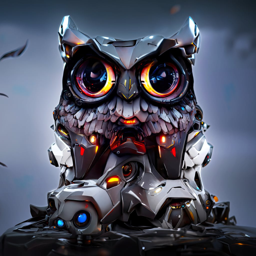

a close up of a robot owl with glowing eyes, unreal engine character art, from transformers, by Zlatyu Boyadzhiev, cute owl, made up of many bits of metal, unreal engine ”, robot face bust, painting by android jones, angry 8 k, character design contest winner, cgsociety - w 1 0 2 4 - n 8 - i




Generated 292 prompts and saved to /content/output/desc.csv, enjoy!


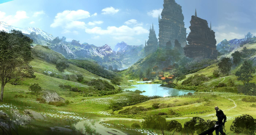

a man riding a horse through a lush green valley, feng zhu concept art, giant medieval tower concept art, mobile wallpaper, lovely valley, inspired by Stephan Martiniere, zenithal view, <mmorpgs scene, beautiful scenic view, anime beautiful peace scene, vertical wallpaper, beautiful render of a fairytale, sunny landscape, beautiful rendering, an amazing landscape image




Generated 371 prompts and saved to /content/output/desc.csv, enjoy!


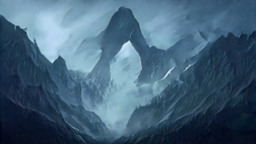

a man standing on top of a snow covered mountain, andreas rocha and john howe, world seen only through a portal, teaser, gigantic mountains, from of thrones, speedpaint, himalayas, 2029, omg, devils horns, animation still screencap, jaw dropping beauty, art of angrysnail, 8 0 s art, by Doris Blair




Generated 298 prompts and saved to /content/output/desc.csv, enjoy!


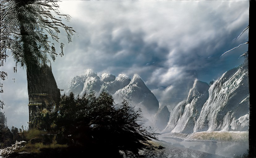

a castle sitting on top of a mountain next to a body of water, by Kim Keever, winter scene fantasy, greek fantasy panorama, stormy snowy fiji mountain, trees and cliffs, by Dan Scott, jagged metal landscape, photomanipulation, paul barson, himalayas, version 3, ominous! landscape of north bend, 1 5 0 0, cliff side




Generated 315 prompts and saved to /content/output/desc.csv, enjoy!


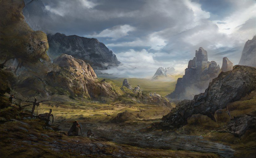

a group of people standing on top of a mountain, d&d trending on artstation, the middle of a valley, mobile wallpaper, cgsociety uhd 4k highly detailed, whiterun in the style of pixar, lonely landscape, square enix cinematic art, in a vast serene landscape, scenic landscape




Generated 274 prompts and saved to /content/output/desc.csv, enjoy!
Prompt saved at /content/output/desc.csv


In [27]:
generate_prompt_csv(csv_path,image_list,prompt_list)

## Analyze image

In [ ]:
def image_analysis(image, clip_model_name):
    # move selected model to GPU and other model to CPU
    if clip_model_name == MODELS[0]:
        ci_vith.clip_model = ci_vith.clip_model.to("cpu")
        ci_vitl.clip_model = ci_vitl.clip_model.to(ci_vitl.device)
        ci = ci_vitl
    else:
        ci_vitl.clip_model = ci_vitl.clip_model.to("cpu")
        ci_vith.clip_model = ci_vith.clip_model.to(ci_vith.device)
        ci = ci_vith

    image = image.convert('RGB')
    image_features = ci.image_to_features(image)

    top_mediums = ci.mediums.rank(image_features, 5)
    top_artists = ci.artists.rank(image_features, 5)
    top_movements = ci.movements.rank(image_features, 5)
    top_trendings = ci.trendings.rank(image_features, 5)
    top_flavors = ci.flavors.rank(image_features, 5)

    medium_ranks = {medium: sim for medium, sim in zip(top_mediums, ci.similarities(image_features, top_mediums))}
    artist_ranks = {artist: sim for artist, sim in zip(top_artists, ci.similarities(image_features, top_artists))}
    movement_ranks = {movement: sim for movement, sim in zip(top_movements, ci.similarities(image_features, top_movements))}
    trending_ranks = {trending: sim for trending, sim in zip(top_trendings, ci.similarities(image_features, top_trendings))}
    flavor_ranks = {flavor: sim for flavor, sim in zip(top_flavors, ci.similarities(image_features, top_flavors))}
    
    return medium_ranks, artist_ranks, movement_ranks, trending_ranks, flavor_ranks

In [ ]:
image_list

['/content/my_images/maxresdefault.jpg',
 '/content/my_images/rockland.jpeg',
 '/content/my_images/55aaa9d7a475c281fcb47e242db7feb9.jpg',
 '/content/my_images/thetree.png']

In [ ]:
medium_list = []
artist_list = []
movement_list = []
trending_list = []
flavour_list = []
image_dict = {}
for idx, images in enumerate(tqdm(image_list, desc='Analyzing images')):
   print(images)
   medium_ranks, artist_ranks, movement_ranks, trending_ranks, flavor_ranks = image_analysis(Image.open(images), MODELS[1])
       
   image_dict[images] = {"medium":medium_ranks,
                                "artist":artist_ranks,
                                "trending":trending_ranks,
                                "flavor":flavor_ranks}

Analyzing images:   0%|          | 0/4 [00:00<?, ?it/s]

/content/my_images/maxresdefault.jpg



100%|██████████| 6/6 [00:00<00:00, 125.03it/s]

Analyzing images:  25%|██▌       | 1/4 [00:00<00:01,  1.96it/s]

/content/my_images/rockland.jpeg



100%|██████████| 6/6 [00:00<00:00, 143.51it/s]

Analyzing images:  50%|█████     | 2/4 [00:01<00:01,  1.98it/s]

/content/my_images/55aaa9d7a475c281fcb47e242db7feb9.jpg



100%|██████████| 6/6 [00:00<00:00, 134.38it/s]

Analyzing images:  75%|███████▌  | 3/4 [00:01<00:00,  1.64it/s]

/content/my_images/thetree.png



100%|██████████| 6/6 [00:00<00:00, 142.15it/s]

Analyzing images: 100%|██████████| 4/4 [00:02<00:00,  1.77it/s]


In [ ]:
image_dict

{'/content/my_images/maxresdefault.jpg': {'medium': {'a matte painting': 0.289794921875,
   'concept art': 0.281005859375,
   'a detailed matte painting': 0.275390625,
   'a digital painting': 0.2490234375,
   'digital art': 0.2314453125},
  'artist': {'inspired by John Howe': 0.30224609375,
   'inspired by Andreas Rocha': 0.294189453125,
   'inspired by Noah Bradley': 0.29345703125,
   'by Izidor Kršnjavi': 0.2841796875,
   'by Anton Räderscheidt': 0.28173828125},
  'trending': {'deviantart': 0.2406005859375,
   'Artstation': 0.239501953125,
   'Artstation contest winner': 0.2381591796875,
   'trending on deviantart': 0.232177734375,
   'deviantart contest winner': 0.224853515625},
  'flavor': {'icy mountains': 0.334228515625,
   'dota! matte painting concept art': 0.322021484375,
   'dota matte painting concept art': 0.3212890625,
   "theme :'icewind dale '": 0.31884765625,
   'lord of the rings concept art': 0.315185546875}},
 '/content/my_images/rockland.jpeg': {'medium': {'a matte

In [ ]:
import pandas as pd
analyze = pd.DataFrame(image_dict).T.reset_index().rename(columns={'index':'Image_path'})

In [ ]:
analyze.to_csv('/content/output/analyze.csv')

## Download images

In [6]:
!wget "https://i.ytimg.com/vi/z3lsZcV76KE/maxresdefault.jpg"

--2023-03-31 06:49:17--  https://i.ytimg.com/vi/z3lsZcV76KE/maxresdefault.jpg
Resolving i.ytimg.com (i.ytimg.com)... 142.250.101.119, 142.251.2.119, 142.250.141.119, ...
Connecting to i.ytimg.com (i.ytimg.com)|142.250.101.119|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 81044 (79K) [image/jpeg]
Saving to: ‘maxresdefault.jpg’

maxresdefault.jpg   100%[===================>]  79.14K  --.-KB/s    in 0.001s  

2023-03-31 06:49:17 (137 MB/s) - ‘maxresdefault.jpg’ saved [81044/81044]



In [7]:
!wget "https://tomco.neocities.org/thetree.png"

--2023-03-31 06:49:20--  https://tomco.neocities.org/thetree.png
Resolving tomco.neocities.org (tomco.neocities.org)... 198.51.233.2, 2620:2:6000::a:1
Connecting to tomco.neocities.org (tomco.neocities.org)|198.51.233.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 131618 (129K) [image/png]
Saving to: ‘thetree.png’

thetree.png         100%[===================>] 128.53K   679KB/s    in 0.2s    

2023-03-31 06:49:20 (679 KB/s) - ‘thetree.png’ saved [131618/131618]



In [8]:
!wget "https://tomco.neocities.org/rockland.jpeg"

--2023-03-31 06:49:22--  https://tomco.neocities.org/rockland.jpeg
Resolving tomco.neocities.org (tomco.neocities.org)... 198.51.233.2, 2620:2:6000::a:1
Connecting to tomco.neocities.org (tomco.neocities.org)|198.51.233.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85722 (84K) [image/jpeg]
Saving to: ‘rockland.jpeg’

rockland.jpeg       100%[===================>]  83.71K  --.-KB/s    in 0.1s    

2023-03-31 06:49:23 (670 KB/s) - ‘rockland.jpeg’ saved [85722/85722]



In [9]:
! wget "https://i.pinimg.com/originals/55/aa/a9/55aaa9d7a475c281fcb47e242db7feb9.jpg"

--2023-03-31 06:49:27--  https://i.pinimg.com/originals/55/aa/a9/55aaa9d7a475c281fcb47e242db7feb9.jpg
Resolving i.pinimg.com (i.pinimg.com)... 104.18.41.40, 172.64.146.216, 2a04:4e42:87::84
Connecting to i.pinimg.com (i.pinimg.com)|104.18.41.40|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 206978 (202K) [image/jpeg]
Saving to: ‘55aaa9d7a475c281fcb47e242db7feb9.jpg’

55aaa9d7a475c281fcb 100%[===================>] 202.13K  --.-KB/s    in 0.02s   

2023-03-31 06:49:28 (8.56 MB/s) - ‘55aaa9d7a475c281fcb47e242db7feb9.jpg’ saved [206978/206978]



In [10]:
!wget "https://pharmapsychotic.com/images/robo_owl.jpg"

--2023-03-31 06:49:31--  https://pharmapsychotic.com/images/robo_owl.jpg
Resolving pharmapsychotic.com (pharmapsychotic.com)... 69.163.152.182
Connecting to pharmapsychotic.com (pharmapsychotic.com)|69.163.152.182|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 137100 (134K) [image/jpeg]
Saving to: ‘robo_owl.jpg’

robo_owl.jpg        100%[===================>] 133.89K  --.-KB/s    in 0.1s    

2023-03-31 06:49:31 (1.11 MB/s) - ‘robo_owl.jpg’ saved [137100/137100]



In [12]:
import os
os.mkdir('my_images')

In [19]:
import os
import shutil 
shutil.copy("/content/robo_owl.jpg","/content/my_images")

'/content/my_images/robo_owl.jpg'

## Inference script

In [15]:
from clip_interrogator import Config, Interrogator
import json
import os
import requests
from PIL import Image
import torch

#
def image_to_prompt(image, mode,device,model1,model2):
    # move selected model to GPU and other model to CPU
    ci_vitl.clip_model = ci_vitl.clip_model.to("cpu")
    ci_vith.clip_model = ci_vith.clip_model.to(ci_vith.device)
    ci = ci_vith
    ci.config.blip_num_beams = 64
    ci.config.chunk_size = 2048
    ci.config.flavor_intermediate_count = 1024
    #
    image = image.convert('RGB')
    if mode == 'best':
        prompt = ci.interrogate(image)
    elif mode == 'classic':
        prompt = ci.interrogate_classic(image)
    elif mode == 'fast':
        prompt = ci.interrogate_fast(image)
    elif mode == 'negative':
        prompt = ci.interrogate_negative(image)

    return prompt


#
def preprocess_function(image_path, content_type=None): 
  
    #with open(input_path,"r",encoding='utf-8') as f:
    #    data = f.read()
    #print(data)
    image = Image.open(requests.get(image_path, stream=True).raw)
    return image

#
#
def predict_function(context, model_path):
    device = "gpu" if torch.cuda.is_available() else "cpu"
    model1,model2 = model_path
    mode ='best'
    prompt = image_to_prompt(context, mode,device,model1,model2)
    return prompt

#
def model_load_function(model_path):
    device = "gpu" if torch.cuda.is_available() else "cpu"
    MODELS = ['ViT-L (best for Stable Diffusion 1.*)', 'ViT-H (best for Stable Diffusion 2.*)']

    # load BLIP and ViT-L https://huggingface.co/openai/clip-vit-large-patch14
    config = Config(clip_model_name="ViT-L-14/openai")
    ci_vitl = Interrogator(config)
    ci_vitl.clip_model = ci_vitl.clip_model.to("cpu")

    # load ViT-H https://huggingface.co/laion/CLIP-ViT-H-14-laion2B-s32B-b79K
    config.blip_model = ci_vitl.blip_model
    config.clip_model_name = "ViT-H-14/laion2b_s32b_b79k"
    ci_vith = Interrogator(config)
    ci_vith.clip_model = ci_vith.clip_model.to("cpu")
    return (ci_vitl.clip_model,ci_vith.clip_model)


#
def postprocess_function(predictions, content_type=None):
  return json.dumps({"response": predictions})


#"""
if __name__ == '__main__':
    audio_path = "https://pharmapsychotic.com/images/robo_owl.jpg"
    data= preprocess_function(audio_path)
    model_path = "./model_files"
    path = model_load_function(model_path)
    predictions = predict_function(data,path)
    out = postprocess_function(predictions)
    print(out)
#"""

Loading BLIP model...
load checkpoint from https://storage.googleapis.com/sfr-vision-language-research/BLIP/models/model_large_caption.pth
Loading CLIP model...
Loaded CLIP model and data in 8.18 seconds.
Loading CLIP model...
Loaded CLIP model and data in 12.42 seconds.


100%|██████████| 50/50 [00:00<00:00, 192.15it/s]

{"response": "a close up of a robot owl with glowing eyes, unreal engine character art, from transformers, by Zlatyu Boyadzhiev, cute owl, made up of many bits of metal, unreal engine \u201d, robot face bust, ivan plusch artwork, scowling, painting by android jones, rendering on unreal engine, ((unreal engine))"}
